#Importação dos dados usando Pandas

In [ ]:
import pandas as pd

In [ ]:
gorjetas = pd.read_csv('tips (1).csv')

In [ ]:
gorjetas.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


#Tradução dos dados



In [ ]:
gorjetas.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [ ]:
colunas_trad = {
    'total_bill' : 'valor_conta',
    'tip' : 'gorjeta',
    'dessert' : 'sobremesa',
    'day' : 'dia_da_semana',
    'time' : 'hora_do_dia',
    'size' : 'pessoas_na_mesa'
}

In [ ]:
gorjetas = gorjetas.rename(columns = colunas_trad)

In [ ]:
gorjetas.head()

,valor_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,pessoas_na_mesa
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


Agora vamos alterar os valores das colunas.

In [ ]:
#Mostra quais os diferentes tipos de valores nessa coluna
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
sim_nao_trad = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

In [ ]:
gorjetas.sobremesa.map(sim_nao_trad)
#Entretanto, aqui ainda não muda o DF, pra isso temos que usarmos outro esquema (a seguir)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [ ]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao_trad)

In [ ]:
type(gorjetas.columns)

pandas.core.indexes.base.Index

In [ ]:
type(gorjetas.sobremesa.map(sim_nao_trad))

#OU SEJA, valores de DFs são dados em SERIES, e suas colunas são dadas em INDEX

pandas.core.series.Series

In [ ]:
gorjetas.head()

,valor_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,pessoas_na_mesa
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


Agora vamos fazer isso para as outras colunas (dia_da_semana e hora_do_dia)

In [ ]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [ ]:
trad_dias = {
    'Sun' : 'Dom',
    'Sat' : 'Sab',
    'Thur' : 'Qui',
    'Fri' : 'Sex'
}

In [ ]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(trad_dias)

##########################################################################

In [ ]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [ ]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map({'Dinner' : 'Almoço', 'Lunch' : 'Jantar'})

##########################################################################

In [ ]:
gorjetas.head()

,valor_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,pessoas_na_mesa
0,16.99,1.01,Não,Dom,Almoço,2
1,10.34,1.66,Não,Dom,Almoço,3
2,21.01,3.50,Não,Dom,Almoço,3
3,23.68,3.31,Não,Dom,Almoço,2
4,24.59,3.61,Não,Dom,Almoço,4


Agora o DF está totalmente traduzido!

# Data visualization com o Seaborn

O **Seaborn** é uma biblioteca de alto nível para visualização de dados representados em **DFs do Pandas**

In [ ]:
import seaborn as sns

**Vamos analisar a relação entre o valor das gorjetas e o preço do pedido através de um gráfico com Seaborn**

In [ ]:
gorjetas.columns

Index(['valor_conta', 'gorjeta', 'sobremesa', 'dia_da_semana', 'hora_do_dia',
       'pessoas_na_mesa'],
      dtype='object')

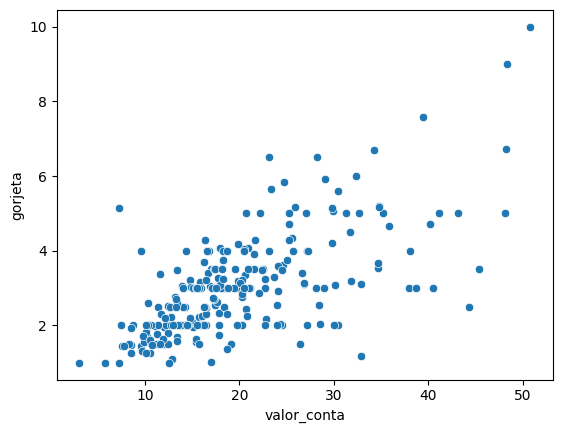

In [ ]:
conta_gorjeta = sns.scatterplot(x='valor_conta', y='gorjeta', data=gorjetas)

Assim, temos que aparentemente o valor da gorjeta aumenta quando aumentamos o valor da conta.

In [ ]:
# Realizando a contagem de NaNs no Pandas

gorjetas.gorjeta.count()

244

In [ ]:
# Mesma contagem para todo o DF

gorjetas.count()

valor_conta        244
gorjeta            244
sobremesa          244
dia_da_semana      244
hora_do_dia        244
pessoas_na_mesa    244
dtype: int64

In [ ]:
# Como o shape é (244, 6), então não temos NaNs nesse DF.
gorjetas.shape

(244, 6)

In [ ]:
#------------------------------------------------------------------------------------------------------------------------#

Vamos verificar agora quanto equivale, em porcentagem da conta, cada gorjeta.
Se o cliente paga 50 na conta e 5 na gorjeta, então a porcentagem é de 10% e assim por diante.

In [ ]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_conta']

In [ ]:
gorjetas.head()

,valor_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,pessoas_na_mesa,porcentagem
0,16.99,1.01,Não,Dom,Almoço,2,0.059447
1,10.34,1.66,Não,Dom,Almoço,3,0.160542
2,21.01,3.50,Não,Dom,Almoço,3,0.166587
3,23.68,3.31,Não,Dom,Almoço,2,0.139780
4,24.59,3.61,Não,Dom,Almoço,4,0.146808


In [ ]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [ ]:
gorjetas.head()

,valor_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,pessoas_na_mesa,porcentagem
0,16.99,1.01,Não,Dom,Almoço,2,0.06
1,10.34,1.66,Não,Dom,Almoço,3,0.16
2,21.01,3.50,Não,Dom,Almoço,3,0.17
3,23.68,3.31,Não,Dom,Almoço,2,0.14
4,24.59,3.61,Não,Dom,Almoço,4,0.15


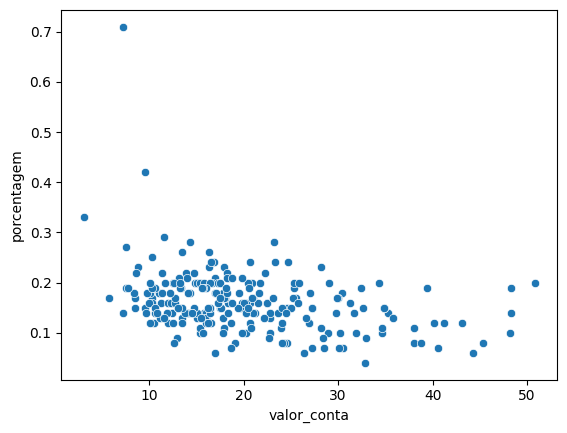

In [ ]:
porcen_valor = sns.scatterplot(x='valor_conta', y='porcentagem', data=gorjetas)

Ou seja, por mais que o gráfico anterior mostre que o valor absoluto da gorjeta aumenta, podemos concluir na análise percentual que, conforme se aumenta o valor da conta, visualmente a porcentagem da gorjeta em relação a conta **DIMINUI**

Para que a diferença fique mais evidente, podemos usar o relplot e o lmplot.

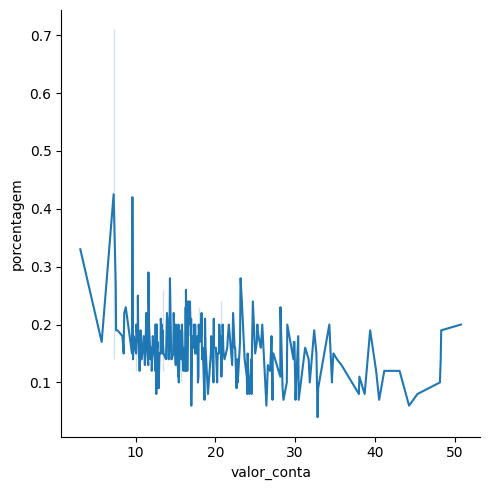

In [ ]:
# relplot -> com o kind em 'line', gera um gráfico de linhas, em que a densidade dos dados pode ser observada
p_conta_relplot = sns.relplot(x='valor_conta', y='porcentagem', data=gorjetas, kind='line')

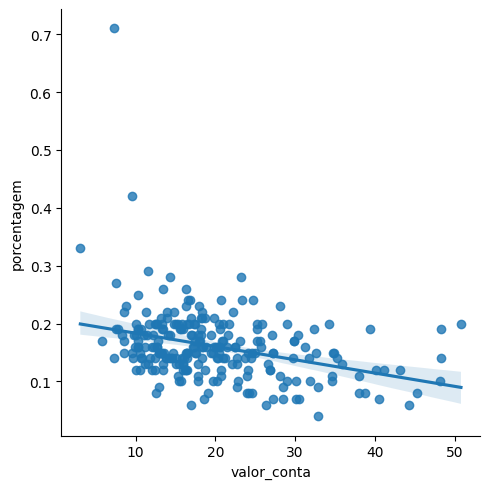

In [ ]:
# lmplot -> cria uma regressão linear dos dados para que se observe e se possa predizer comportamentos
p_conta_lmplot = sns.lmplot(x='valor_conta', y='porcentagem', data=gorjetas)

Assim, fica evidente a que a porcentagem da gorjeta cai com o aumento do valor da conta.

Agora vamos explorar um pouco a estilização dos gráficos no Seaborn. Podemos colocar título superior, título normal e as labels dos eixos.

In [ ]:
# Titulo superior e inferior, get_figure

porcen_valor

<Axes: xlabel='valor_conta', ylabel='porcentagem'>

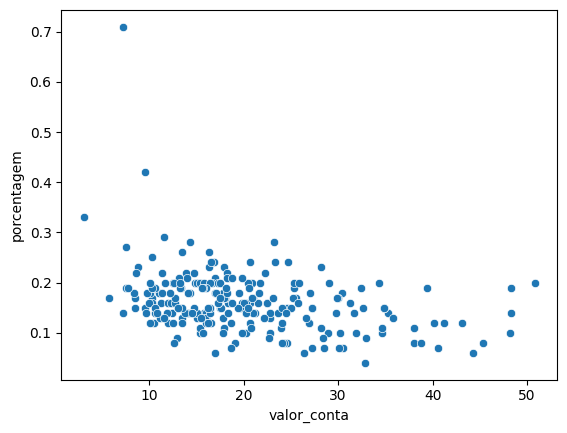

In [ ]:
# Para mostrar a imagem, precisamos usar o get_figure

porcen_valor.get_figure()

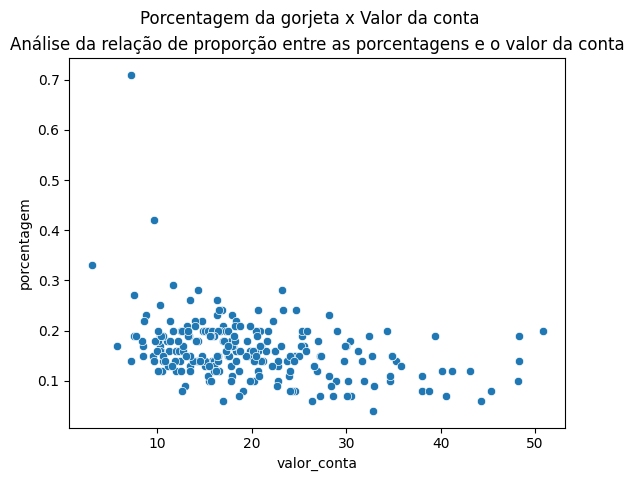

In [ ]:
porcen_valor.figure.suptitle('Porcentagem da gorjeta x Valor da conta')
porcen_valor.set_title('Análise da relação de proporção entre as porcentagens e o valor da conta')
porcen_valor.get_figure()

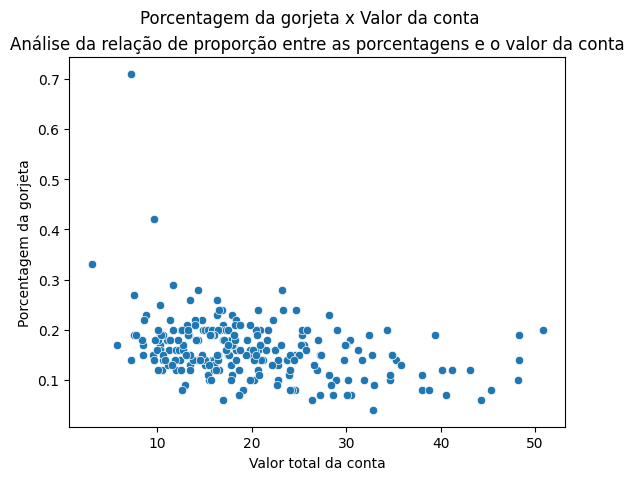

In [ ]:
porcen_valor.set(xlabel='Valor total da conta', ylabel='Porcentagem da gorjeta')
porcen_valor.get_figure()